In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
df = pd.read_csv("../../datasets/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [101]:
df = df.drop(["EmployeeNumber","EmployeeCount","Over18","StandardHours"], axis=1)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [102]:
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [103]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [104]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [105]:
y_pred = model.predict(X_test)

In [106]:
print("Accuracy: ", round(accuracy_score(y_test, y_pred)*100, 3), "%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  79.592 %
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       247
           1       0.35      0.32      0.33        47

    accuracy                           0.80       294
   macro avg       0.61      0.60      0.61       294
weighted avg       0.79      0.80      0.79       294



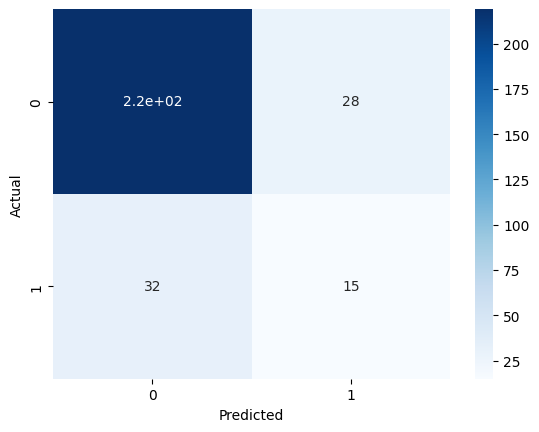

In [107]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Axes: xlabel='Importance', ylabel='Feature'>

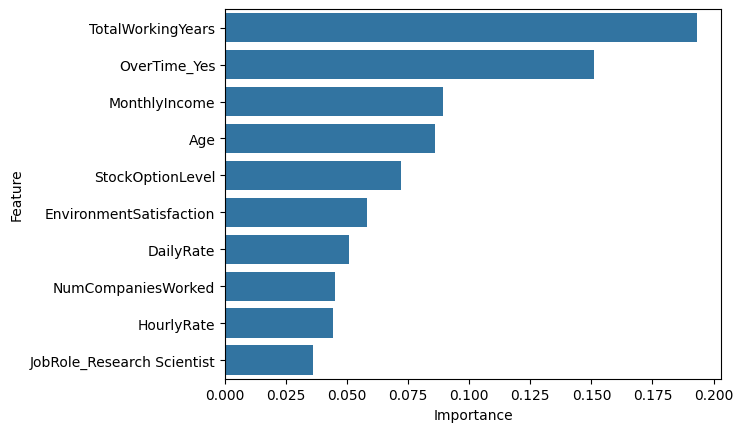

In [ ]:
feature_imp_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature",data=feature_imp_dt.head(10))

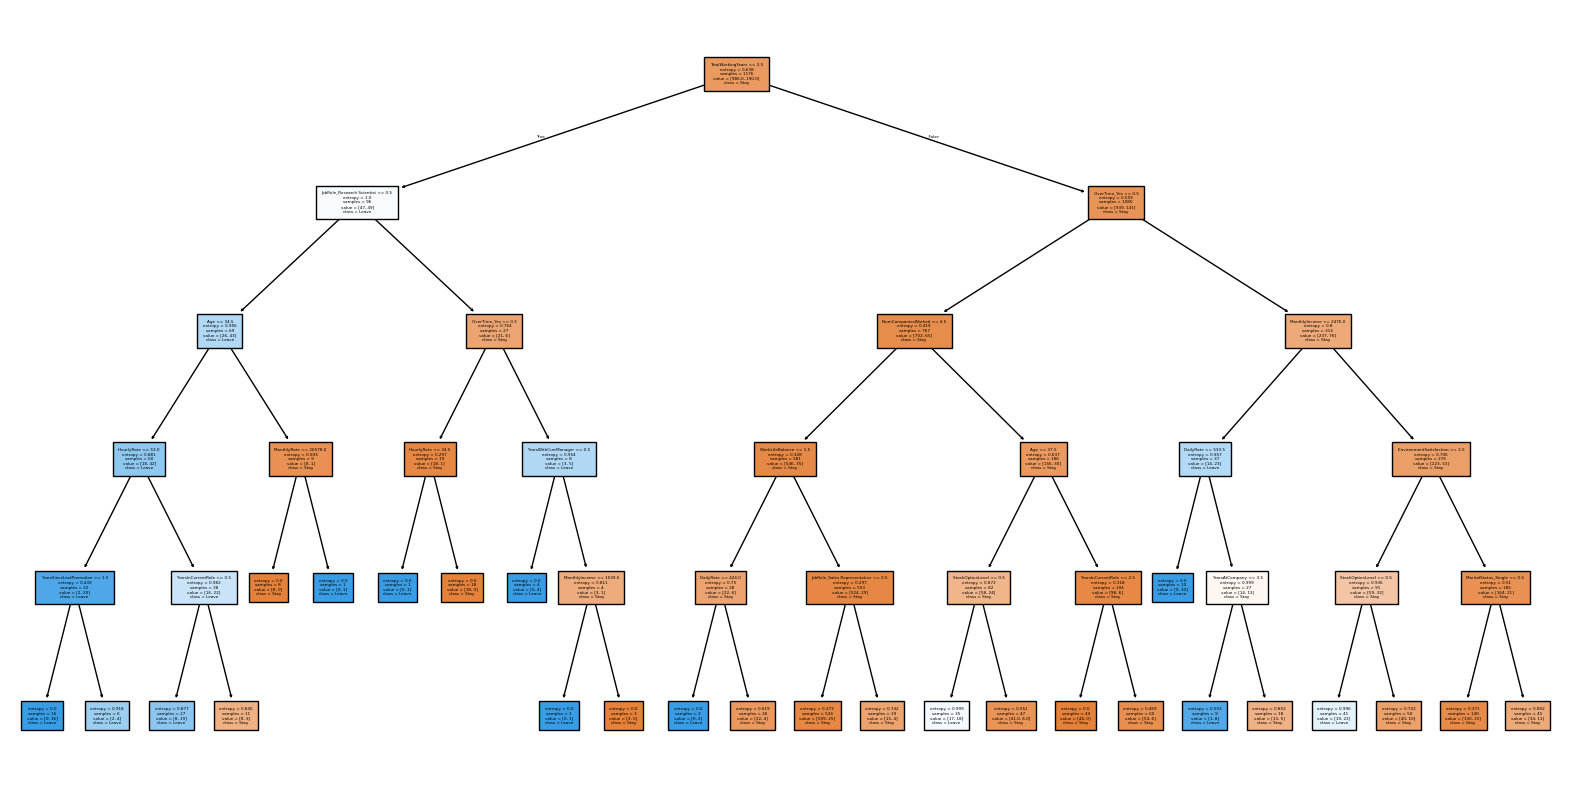

In [119]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Stay", "Leave"], fontsize=3)
plt.show()

In [134]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=None, 
                                  random_state=42, 
                                  n_jobs=-1,  # utilize all CPU cores
                                  class_weight="balanced"
                                  )

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
y_pred_rf = rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("classification_report:\n", classification_report(y_test, y_pred_rf))

Accuracy:  0.8367346938775511
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



<Axes: xlabel='Importance', ylabel='Feature'>

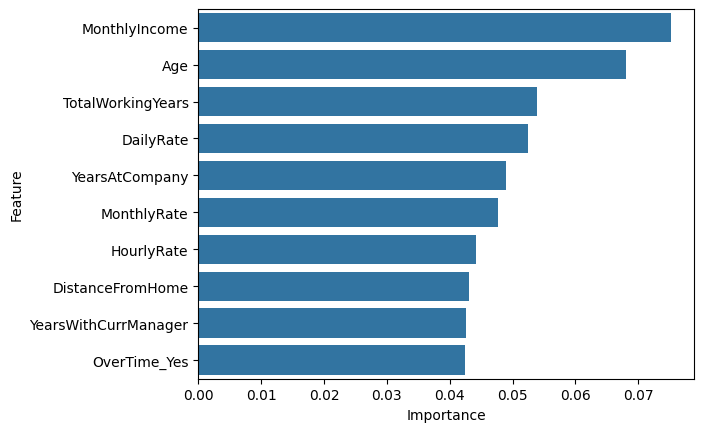

In [136]:
feature_imp_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature",data=feature_imp_dt.head(10))

In [ ]:
# What is Synthetic Data